In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import os
import glob as gb
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential

from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
import kaggle

In [ ]:
!kaggle datasets download -d ameyamote030/einterface-image-dataset

 96% 769M/801M [00:08<00:00, 108MB/s]
100% 801M/801M [00:08<00:00, 98.2MB/s]


In [ ]:
from zipfile import ZipFile

dataset =  "/content/einterface-image-dataset.zip"




with ZipFile(dataset , 'r') as zip :

  zip.extractall()
  print('dataset is extracted')

dataset is extracted


In [ ]:
train_dir = '/content/eINTERFACE_2021_Image/train'
valid_dir = '/content/eINTERFACE_2021_Image/val'
test_dir = '/content/eINTERFACE_2021_Image/test'

In [ ]:
##Training data size

for folder in os.listdir(train_dir) :
  files = gb.glob(pathname=(train_dir +'/' + folder +'/*.jpg'))
  print(f'for training set found {len(files)} in {folder}')


for training set found 1922 in Surprise
for training set found 1922 in Fear
for training set found 1922 in Sadness
for training set found 1922 in Happiness
for training set found 1891 in Disgust
for training set found 1896 in Anger


In [ ]:
##valdiation data size

for folder in os.listdir(valid_dir) :
  files = gb.glob(pathname=(valid_dir +'/' + folder +'/*.jpg'))
  print(f'for validation set found {len(files)} in {folder}')

for validation set found 240 in Surprise
for validation set found 240 in Fear
for validation set found 240 in Sadness
for validation set found 240 in Happiness
for validation set found 236 in Disgust
for validation set found 237 in Anger


In [ ]:
##testing data size

for folder in os.listdir(test_dir) :
  files = gb.glob(pathname=(test_dir +'/' + folder +'/*.jpg'))
  print(f'for testing set found {len(files)} in {folder}')

for testing set found 241 in Surprise
for testing set found 241 in Fear
for testing set found 241 in Sadness
for testing set found 241 in Happiness
for testing set found 237 in Disgust
for testing set found 237 in Anger


In [ ]:
#Data visulation
import random
import matplotlib.image as mpimg



def view_random_image(target_dir, target_class):
    # We will view images from here
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # read in the image and plot it using matplolib
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")

    return img

In [ ]:
class_names =['Anger' , 'Disgust'  , 'Fear' , 'Happiness' ,  'Sadness' ,  'Surprise' ]

In [ ]:
#plt.figure(figsize=(20,10))
#for i in range(18):
#    plt.subplot(3, 6,i+1)
#    class_name = random.choice(class_names)
#    img = view_random_image(target_dir="/content/eINTERFACE_2021_Image/train", target_class=class_name)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (128, 128),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

valid_set = test_datagen.flow_from_directory(valid_dir,
                                            target_size = (128, 128),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 11475 images belonging to 6 classes.
Found 1433 images belonging to 6 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(16 , (3,3) , input_shape = (128,128,3)  , activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32 ,(3,3) ,  activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128 , activation = 'relu'))
model.add(Dense(6 , activation = 'softmax'))


In [ ]:
model.compile( optimizer='adam' ,  loss = 'categorical_crossentropy' ,  metrics = ['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [ ]:
history = model.fit (training_set ,
           epochs = 50 ,
           validation_data = valid_set)
model.save('model01.h5')

Epoch 1/50
180/180 [==============================] - 76s 356ms/step - loss: 1.7505 - accuracy: 0.2646 - val_loss: 1.5734 - val_accuracy: 0.3678
Epoch 2/50
180/180 [==============================] - 62s 347ms/step - loss: 1.5038 - accuracy: 0.3932 - val_loss: 1.4190 - val_accuracy: 0.4110
Epoch 3/50
180/180 [==============================] - 62s 346ms/step - loss: 1.3030 - accuracy: 0.4810 - val_loss: 1.1556 - val_accuracy: 0.5548
Epoch 4/50
180/180 [==============================] - 63s 351ms/step - loss: 1.1502 - accuracy: 0.5504 - val_loss: 1.0485 - val_accuracy: 0.5827
Epoch 5/50
180/180 [==============================] - 62s 342ms/step - loss: 1.0499 - accuracy: 0.5899 - val_loss: 0.9903 - val_accuracy: 0.6253
Epoch 6/50
180/180 [==============================] - 62s 344ms/step - loss: 0.9782 - accuracy: 0.6191 - val_loss: 1.0309 - val_accuracy: 0.5848
Epoch 7/50
180/180 [==============================] - 62s 345ms/step - loss: 0.9084 - accuracy: 0.6547 - val_loss: 1.0630 - val_ac

In [ ]:

test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (128, 128),
                                            batch_size = 64,
                                            class_mode = 'categorical')

model.evaluate(test_set)

Found 1438 images belonging to 6 classes.
23/23 [==============================] - 4s 187ms/step - loss: 0.3271 - accuracy: 0.8866


[0.3270922303199768, 0.8866481184959412]

Text(0, 0.5, 'Loss')

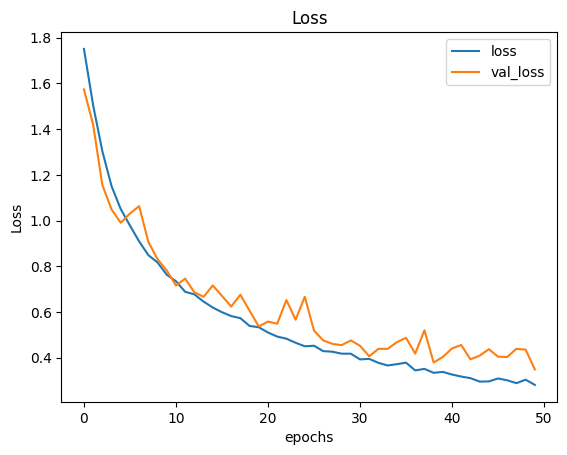

In [ ]:
import pandas as pd
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'accuracy')

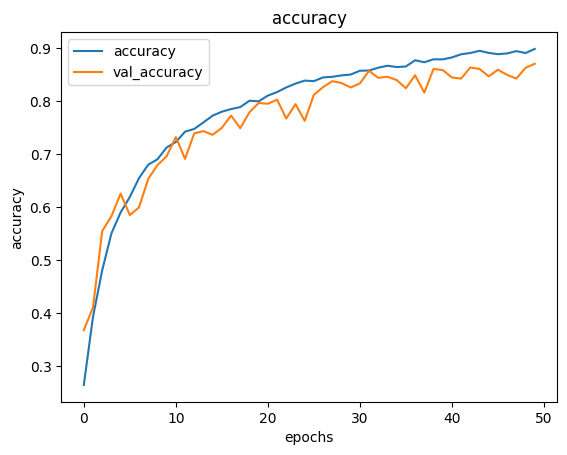

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [ ]:
model_path = "model01.h5"
loaded_model = keras.models.load_model(model_path)

import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

image = cv2.imread("/content/22.jpeg")
image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((128, 128))
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255
pred = loaded_model.predict(input_data)
result = pred.argmax()
print(class_names[result])

1/1 [==============================] - 0s 90ms/step
Happiness


In [ ]:
training_set.class_indices

{'Anger': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happiness': 3,
 'Sadness': 4,
 'Surprise': 5}

In [ ]:

import cv2
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]

    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))

    yhat = loaded_model.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    image = cv2.imread("/content/22.jpeg")
    gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    image_fromarray = Image.fromarray(gray, 'RGB')
    resize_image = image_fromarray.resize((128, 128))
    expand_input = np.expand_dims(resize_image,axis=0)
    input_data = np.array(expand_input)
    input_data = input_data/255
    pred = loaded_model.predict(input_data)
    result = pred.argmax()




        # Controls the text rendered
        cv2.putText(frame, class_names[result] , tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

    cv2.imshow('EyeTrack', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()